In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import collections
from google.colab import files
import sklearn # Only using to shuffle data

# Load data
!wget https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat
data = sio.loadmat('mnist.mat')

--2023-01-10 18:41:47--  https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat [following]
--2023-01-10 18:41:48--  https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14278089 (14M) [application/octet-stream]
Saving to: ‘mnist.mat’

mnist.mat           100%[===================>]  13.62M  --.-KB/s    in 0.05s   

2023-01-10 18:41:48 (272 MB/s) - ‘mnist.mat’ saved [14278089/14278089]



The shape of X_train is: (60000, 784)
The shape of Y_train is: (60000,)
The shape of X_test is: (10000, 784)
The shape of Y_test is: (10000,)

The label at index 0 is 7 and the image shows 


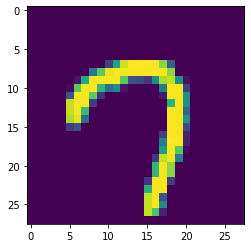

In [2]:
# Avoiding 0 values which could prevent weight updates
fac = 0.99 / 255

X_train = data['trainX'] * fac + 0.01
Y_train = data['trainY'] 

X_test = data['testX']  * fac + 0.01
Y_test = data['testY']

# Flatten ndarray
Y_test = Y_test.reshape(len(Y_test[0]))
Y_train = Y_train.reshape(len(Y_train[0]))  

# Used for Figure 1, with respect to num of training samples, fixed number of 200 testing samples
#X_train = X_train[:5000]
#Y_train = Y_train[:5000]

# Used for Figure 2, with respect to num of testing samples, fixed number of 500 training samples
#X_train = X_train[0:500]
#Y_train = Y_train[0:500]

# Shuffle data in unison
X_train , Y_train = sklearn.utils.shuffle(X_train , Y_train)
X_test, Y_test = sklearn.utils.shuffle(X_test, Y_test)

print("The shape of X_train is: " + str(X_train.shape))
print("The shape of Y_train is: " + str(Y_train.shape))
print("The shape of X_test is: " + str(X_test.shape))
print("The shape of Y_test is: " + str(Y_test.shape))

# Used to see the real data directly from data set
def drawImg(sample):
    fig, ax = plt.subplots(1)
    ax.imshow(np.reshape(sample, (28, 28)))

drawImg(X_train[0])
print("\nThe label at index 0 is " + str(Y_train[0]) + " and the image shows ")

In [3]:
# Calculating Euclidean Distance
def distance(x,y):
    return np.sqrt(np.sum(np.square(x-y)))

# Applying K-nearest Neighbours
def knn(X_train, Y_train, X_test, k):
    # List of distances between test image and training images
    vals = []
    len_train = X_train.shape[0]
    
    for i in range(len_train):
      d = distance(X_test, X_train[i])
      vals.append((d, Y_train[i]))
        
    vals = sorted(vals)
    
    # Find the nearest first k points
    vals = vals[:k]
    vals = np.array(vals)
    
    # Find the maximum one from the index
    new_vals = np.unique(vals[:,1],return_counts = True)
    index = new_vals[1].argmax() 
    pred = new_vals[0][index]

    return pred

In [4]:
# Testing prediction
pred = int(knn(X_train,Y_train, X_test[0], 5))
print("Expected: " + str(Y_test[0]))
print("Actual: " + str(pred))

Expected: 7
Actual: 9


In [5]:
# Calculating the accuracy of our model with the first N test values
N = 200 # Num of test samples

predictions = []
errors = dict([(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0)])

def accuracy(X_train, Y_train, N, k):
    correct = 0
    incorrect = 0

    # Loop through test set and compare labels
    for i in range(N):
        pred = int(knn(X_train,Y_train, X_test[i], k))
        predictions.append(pred)

        #print("Expected: " + str(Y_test[i]))
        #print("Actual: " + str(pred))

        if pred == Y_test[i]:
            correct += 1
        else:
            incorrect += 1
            errors[pred] += 1

    accuracy = (correct/float(N))*100

    print("\nCorrect: " + str(correct))
    print("Incorrect: " + str(incorrect))  
    print("Accuracy: " + str(accuracy) + "%")

    return accuracy

accuracy(X_train, Y_train, N, 5)
Y_predict = np.array(predictions)


Correct: 193
Incorrect: 7
Accuracy: 96.5%


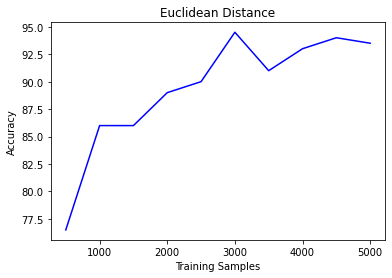

In [6]:
# Figure 1, Compute accuracy with respect to the number of training samples. Test Samples = 200, Various training samples used on each run

train_samples = np.array([500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000])
accuracy1 = np.array([76.50, 86.00, 86.00, 89.00, 90.00, 94.50, 91.00, 93.00, 94.00, 93.50])

# Graph
plt.title('Euclidean Distance')
plt.xlabel('Training Samples')
plt.ylabel('Accuracy')
plt.plot(train_samples, accuracy1, 'b')
plt.savefig('respect_train.png', dpi=300)

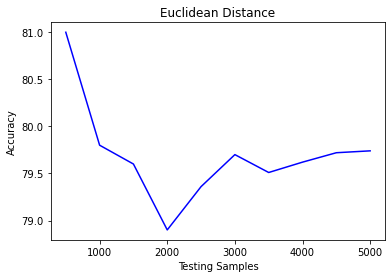

In [7]:
# Figure 2, Compute accuracy with respect to the number of testing samples. Training Samples = 500, Various testing samples used on each run

test_samples = np.array([500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000])
accuracy2 = np.array([81.00, 79.80, 79.6, 78.90, 79.36, 79.7, 79.51, 79.62, 79.72, 79.74])

# Graph
plt.title('Euclidean Distance')
plt.xlabel('Testing Samples')
plt.ylabel('Accuracy')
plt.plot(test_samples, accuracy2, 'b')
plt.savefig('respect_test.png', dpi=300)

[[17.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 23.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. 19.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 11.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 22.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 21.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 18.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0. 24.  0.  1.]
 [ 0.  0.  1.  0.  1.  1.  0.  0. 18.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0. 20.]]
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.05       0.95       0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.        

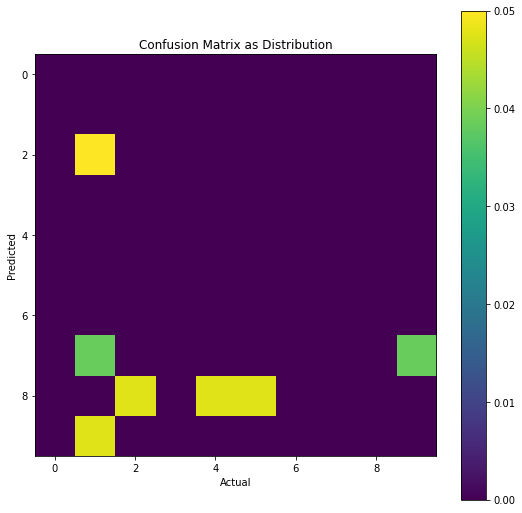

In [8]:
# Figure 3, Compute the confusion matrix without the main diagonal and normalize such that it represents a probability distribution.
def confusion_matrix(actual, predicted):
    # Extract digits
    digits = np.unique(actual)

    # Initalize confusion matrix
    cm = np.zeros((len(digits), len(digits)))

    # Loop across the different combinations of actual / predicted digits
    for i in range(len(digits)):
        for j in range(len(digits)):

           # Count num of instances in each combination of actual / predicted digits
           cm[i, j] = np.sum((actual == digits[i]) & (predicted == digits[j]))

    return cm

cm = confusion_matrix(Y_test[0:N], Y_predict)
print(cm)

# Normalize to represent probability distribution
row_sums = cm.sum(axis=1, keepdims=True)
norm_cm = cm / row_sums

print(norm_cm)

# Graph
np.fill_diagonal(norm_cm, 0)
plt.figure(figsize=(9,9))
plt.imshow(norm_cm)
plt.title('Confusion Matrix as Distribution')
plt.xticks(np.arange(0, 10, 2))
plt.yticks(np.arange(0, 10, 2))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.colorbar()
plt.savefig('conf_matrix.png')

{0: 0, 1: 3, 2: 1, 3: 0, 4: 1, 5: 1, 6: 0, 7: 0, 8: 0, 9: 1}


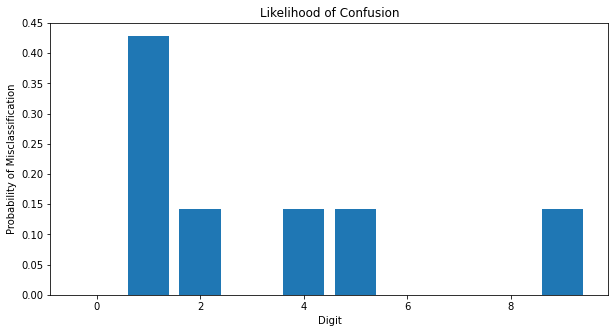

In [9]:
# Figure 4, Compute likelihood of confusion for each digit.
print(errors)
keys = errors.keys()
vals = errors.values()
prob = np.divide(list(vals), sum(vals)) # Calculating probability of misclassification


# Graph
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(keys, prob, width=0.8, align='center')
ax.set(title='Likelihood of Confusion', xlabel='Digit', ylabel='Probability of Misclassification')
plt.savefig('per_digit_conf.png')
plt.show()

In [10]:
# Extra Credit
score = []
for k in range(1, 21):
  print('K =', k)
  acc = float(accuracy(X_train, Y_train, N, k))
  score.append(acc)
  print("\n---------------\n")

K = 1

Correct: 191
Incorrect: 9
Accuracy: 95.5%

---------------

K = 2

Correct: 190
Incorrect: 10
Accuracy: 95.0%

---------------

K = 3

Correct: 190
Incorrect: 10
Accuracy: 95.0%

---------------

K = 4

Correct: 192
Incorrect: 8
Accuracy: 96.0%

---------------

K = 5

Correct: 193
Incorrect: 7
Accuracy: 96.5%

---------------

K = 6

Correct: 191
Incorrect: 9
Accuracy: 95.5%

---------------

K = 7

Correct: 192
Incorrect: 8
Accuracy: 96.0%

---------------

K = 8

Correct: 192
Incorrect: 8
Accuracy: 96.0%

---------------

K = 9

Correct: 191
Incorrect: 9
Accuracy: 95.5%

---------------

K = 10

Correct: 191
Incorrect: 9
Accuracy: 95.5%

---------------

K = 11

Correct: 190
Incorrect: 10
Accuracy: 95.0%

---------------

K = 12

Correct: 192
Incorrect: 8
Accuracy: 96.0%

---------------

K = 13

Correct: 190
Incorrect: 10
Accuracy: 95.0%

---------------

K = 14

Correct: 191
Incorrect: 9
Accuracy: 95.5%

---------------

K = 15

Correct: 190
Incorrect: 10
Accuracy: 95.0%

-

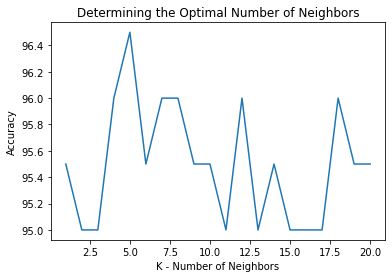

95.5

In [11]:
# Extra Credit Graph
plt.plot(range(1, 21), score)
plt.title('Determining the Optimal Number of Neighbors')
plt.xlabel('K - Number of Neighbors')
plt.ylabel('Accuracy')
plt.savefig('extra_credit.png', dpi=300)
plt.show()

np.mean(score)